In [1]:
import os 

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError 

In [2]:
T =TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:3.589600237319246e-05


In [4]:
class Queue:
    def __init__(self):
        """
        Initializes an empty queue.
        The queue is represented as a list.
        """
        self.queue = []
    
    def addq(self, v):
        """
        Adds an element 'v' to the end of the queue.
        
        Parameters:
        v: The element to be added to the queue.
        """
        self.queue.append(v)
    
    def delq(self):
        """
        Removes and returns the element at the front of the queue.
        
        Returns:
        The element at the front of the queue if the queue is not empty,
        otherwise None.
        """
        v = None 
        if not self.isempty():
            v = self.queue[0]  # Get the first element in the queue
            self.queue = self.queue[1:]  # Remove the first element by slicing
        return v
    
    def isempty(self):
        """
        Checks if the queue is empty.
        
        Returns:
        True if the queue is empty, otherwise False.
        """
        return self.queue == []
    
    def __str__(self):
        """
        Returns a string representation of the queue.
        
        Returns:
        A string representation of the queue list.
        """
        return str(self.queue)

# Example usage
q = Queue()
q.addq(1)
q.addq(2)
q.addq(3)
print(q)       # Output: [1, 2, 3]
print(q.delq())  # Output: 1
print(q)       # Output: [2, 3]
print(q.isempty())  # Output: False
q.delq()
q.delq()
print(q.isempty())  # Output: True
print(q.delq())  # Output: None


[1, 2, 3]
1
[2, 3]
False
True
None


In [5]:
q = Queue()
for i in range(3):
    q.addq(i)
print(q)
print(q.isempty())
for j in range(3):
    print(q.delq(),q)
print(q.isempty())


[0, 1, 2]
False
0 [1, 2]
1 [2]
2 []
True


In [6]:
def BFS(AMat, v):
    """
    Performs Breadth-First Search (BFS) on a graph represented by an adjacency matrix.

    Parameters:
    AMat: 2D numpy array
        The adjacency matrix representing the graph.
    v: int
        The starting vertex for the BFS.

    Returns:
    visited: dict
        A dictionary where keys are the vertices and values are booleans indicating
        whether the vertex has been visited (True) or not (False).
    """
    
    # Get the number of rows (and columns) in the adjacency matrix
    (rows, cols) = AMat.shape

    # Initialize a dictionary to keep track of visited vertices
    visited = {}
    for i in range(rows):
        visited[i] = False
    
    # Initialize the queue for BFS
    q = Queue()

    # Mark the starting vertex as visited and enqueue it
    visited[v] = True
    q.addq(v)

    # Perform BFS
    while not q.isempty():
        # Dequeue a vertex from the queue
        j = q.delq()

        # Get all the neighbors of the dequeued vertex j
        for k in neighbours(AMat, j):
            # If the neighbor has not been visited, mark it as visited and enqueue it
            if not visited[k]:
                visited[k] = True
                q.addq(k)
    
    # Return the dictionary of visited vertices
    return visited

# Define the neighbours function
def neighbours(AMat, j):
    """
    Finds the neighbors of a given vertex in a graph represented by an adjacency matrix.

    Parameters:
    AMat: 2D numpy array
        The adjacency matrix representing the graph.
    j: int
        The vertex for which to find the neighbors.

    Returns:
    list:
        A list of neighbors of vertex j.
    """
    neighbors = []
    for i in range(AMat.shape[1]):
        if AMat[j, i] == 1:  # Assuming 1 indicates an edge/connection
            neighbors.append(i)
    return neighbors


import numpy as np

# Example adjacency matrix
AMat = np.array([[0, 1, 0, 0],
                 [1, 0, 1, 0],
                 [0, 1, 0, 1],
                 [0, 0, 1, 0]])

# Starting vertex
v = 0

# Perform BFS
visited = BFS(AMat, v)
print(visited)  # Output will show which vertices were visited


{0: True, 1: True, 2: True, 3: True}


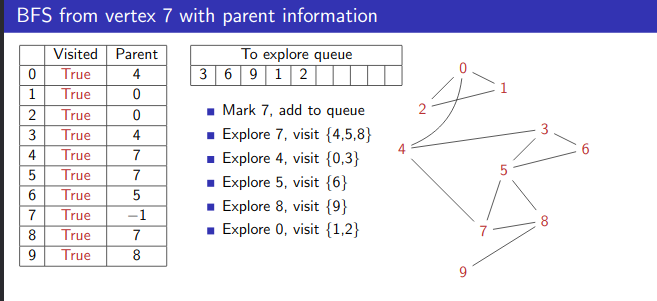

In [7]:


AMat = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
])

In [8]:
# Starting vertex
v = 0

# Perform BFS
visited = BFS(AMat, v)
print(visited) 

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}


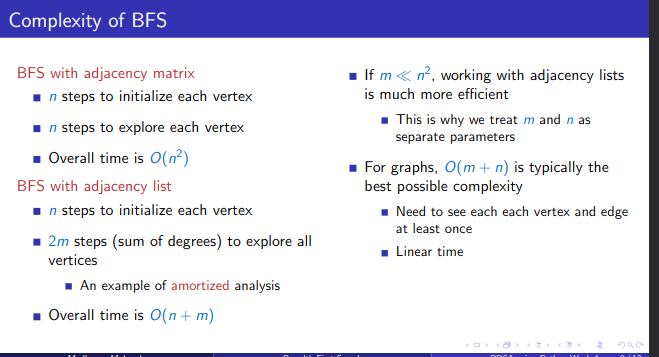

In [9]:
def BFSListPath(AList, v):
    """
    Performs Breadth-First Search (BFS) on a graph represented by an adjacency list.
    
    Parameters:
    AList: dict
        The adjacency list representing the graph, where keys are vertices and values are lists of adjacent vertices.
    v: int
        The starting vertex for the BFS.

    Returns:
    visited: dict
        A dictionary where keys are vertices and values are booleans indicating whether the vertex has been visited.
    parent: dict
        A dictionary where keys are vertices and values are the parent of that vertex in the BFS tree.
    """
    
    # Initialize the visited dictionary and parent dictionary
    visited, parent = {}, {}
    for i in AList.keys():
        visited[i] = False
        parent[i] = -1
    
    # Initialize the queue for BFS
    q = Queue()
    
    # Mark the starting vertex as visited and enqueue it
    visited[v] = True
    q.addq(v)
    
    # Perform BFS
    while not q.isempty():
        # Dequeue a vertex from the queue
        j = q.delq()
        
        # Get all the neighbors of the dequeued vertex j
        for k in AList[j]:
            # If the neighbor has not been visited, mark it as visited and set its parent
            if not visited[k]:
                visited[k] = True
                parent[k] = j
                q.addq(k)
    
    # Return the visited dictionary and the parent dictionary
    return visited, parent

# Example usage
AList = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 4],
    3: [1, 5, 6],
    4: [2, 5, 9],
    5: [3, 4, 7],
    6: [3],
    7: [5, 8],
    8: [7],
    9: [4]
}

# Starting vertex
v = 0

# Perform BFS
visited, parent = BFSListPath(AList, v)
print("Visited:", visited)
print("Parent:", parent)


Visited: {0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}
Parent: {0: -1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 3, 7: 5, 8: 7, 9: 4}


In [13]:
def BFSListPathLevel(AList, v):
    """
    Performs Breadth-First Search (BFS) on a graph represented as an adjacency list,
    starting from vertex `v`. Computes the level (distance from the start vertex) 
    and parent (preceding vertex in the BFS tree) for each vertex in the graph.

    Parameters:
    AList (dict): Adjacency list representation of the graph. 
                  Keys are vertices, values are lists of adjacent vertices.
    v (int): The starting vertex for BFS.

    Returns:
    tuple: A tuple containing two dictionaries:
           - level (dict): Maps each vertex to its level (distance from `v`).
           - parent (dict): Maps each vertex to its parent in the BFS tree. 
                            The parent of the starting vertex `v` is set to -1.
    
    Example usage:
    AList = {
        0: [1, 2],
        1: [0, 3, 4],
        2: [0, 5],
        3: [1],
        4: [1],
        5: [2]
    }
    level, parent = BFSListPathLevel(AList, 0)
    print("Levels:", level)
    print("Parents:", parent)
    """
    
    level = {}
    parent = {}
    
    # Initialize level and parent for each node
    for i in AList.keys():
        level[i] = -1
        parent[i] = -1
    
    # Create a queue and enqueue the starting vertex
    q = Queue()
    level[v] = 0
    q.addq(v)
    
    # BFS algorithm
    while not q.isempty():
        j = q.delq()
        for k in AList[j]:
            if level[k] == -1:  # If k is not visited
                level[k] = level[j] + 1
                parent[k] = j
                q.addq(k)
    
    return level, parent

# Example usage
AList = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5],
    3: [1],
    4: [1],
    5: [2]
}

level, parent = BFSListPathLevel(AList, 0)
print("Levels:", level)
print("Parents:", parent)


Levels: {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2}
Parents: {0: -1, 1: 0, 2: 0, 3: 1, 4: 1, 5: 2}
